In [1]:
import pandas as pd

In [2]:
# 데이터 불러오기
df = pd.read_csv('../../data/english_data_including_content_and_area_of_thumbnailtext.csv', usecols = [6, 8, 9], encoding='UTF-8')
df.head(3)

,view,thumbnail_text_content,thumbnail_text_area
0,101580,Sweets How,0.11259
1,1147867,NaN,0.00000
2,429219,NaN,0.00000


In [4]:
data_cat = df.copy()           
#print(data_cat.info())           
data_cat['views'] = (data_cat['view'].floordiv(1000))
data_cat['content'] = data_cat['thumbnail_text_content'].fillna('  ')
data_cat['area'] = (data_cat['thumbnail_text_area']*10000).astype('int64')
data_cat.drop(['view', 'thumbnail_text_content', 'thumbnail_text_area'], axis='columns', inplace=True)
data_cat.head(4)

,views,content,area
0,101,Sweets How,1125
1,1147,,0
2,429,,0
3,607,I 6AM school morning routine,1195


## 조회수 one-hot encoding

In [5]:
data_cat['views'].max()

314441

In [6]:
import math # 구간 나눠주기 -> multiclass classification

for index, view in enumerate(data_cat['views']):
  # if view >= 50000:  data_cat['views'][index] =  50000
  if view >=10000:  data_cat['views'][index] =  5
  # elif view >=5000:  data_cat['views'][index] =  5000
  elif view >=1000:  data_cat['views'][index] =  4
  # elif view >=500:  data_cat['views'][index] =  500
  elif view >=100:  data_cat['views'][index] = 3
  # elif view >=50: data_cat['views'][index] =  50
  elif view >=10: data_cat['views'][index] = 2
  # elif view >=5: data_cat['views'][index] = 5
  # elif view >5: data_cat['views'][index] = math.floor(data_cat['views'][index]/5) * 5
  elif view > 0: data_cat['views'][index] = 1

<ipython-input-6-2cc45fe1c4ad>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif view >=100:  data_cat['views'][index] = 3
<ipython-input-6-2cc45fe1c4ad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif view >=1000:  data_cat['views'][index] =  4
<ipython-input-6-2cc45fe1c4ad>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif view >=10: data_cat['views'][index] = 2
<ipython-input-6-2cc45fe1c4ad>:14: SettingWithCopyWarning

In [7]:
from collections import Counter

label = Counter(data_cat['views']).keys()
label = sorted(label)
print(label)
print(Counter(data_cat['views']))

[0, 1, 2, 3, 4, 5]
Counter({4: 1504, 3: 1426, 2: 710, 0: 521, 1: 259, 5: 198})


In [9]:
from keras.utils.np_utils import to_categorical

In [10]:
y = to_categorical(data_cat['views']).astype('int64')
y

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

## content preprocess

In [11]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hj99y\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hj99y\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
from nltk.tokenize import word_tokenize

In [13]:
data_cat['content_tokens']=None
data_cat[:3]

,views,content,area,content_tokens
0,3,Sweets How,1125,None
1,4,,0,None
2,3,,0,None


In [14]:
for index in range(len(df)):
    data_cat['content_tokens'][index] = word_tokenize(data_cat['content'][index])
data_cat[:3]

<ipython-input-14-89f23f830b8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['content_tokens'][index] = word_tokenize(data_cat['content'][index])


,views,content,area,content_tokens
0,3,Sweets How,1125,"[Sweets, How]"
1,4,,0,[]
2,3,,0,[]


In [15]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
data_cat['content_tokens1']=None
for index in range(len(df)):
    data_cat['content_tokens1'][index] = [lm.lemmatize(w, pos="v") for w in data_cat['content_tokens'][index]]

<ipython-input-15-38f54ab83882>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['content_tokens1'][index] = [lm.lemmatize(w, pos="v") for w in data_cat['content_tokens'][index]]


In [16]:
from nltk.stem import PorterStemmer
st1 = PorterStemmer()

data_cat['content_tokens2']=None

for index in range(len(df)):
    data_cat['content_tokens2'][index] = [st1.stem(w) for w in data_cat['content_tokens'][index]]

<ipython-input-16-17e4c01d9557>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['content_tokens2'][index] = [st1.stem(w) for w in data_cat['content_tokens'][index]]


In [17]:
from nltk.stem import LancasterStemmer
st2 = LancasterStemmer()

data_cat['content_tokens3']=None

for index in range(len(df)):
    data_cat['content_tokens3'][index] = [st2.stem(w) for w in data_cat['content_tokens'][index]]

<ipython-input-17-a4b2b784d091>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['content_tokens3'][index] = [st2.stem(w) for w in data_cat['content_tokens'][index]]


In [18]:
data_cat[:20]

,views,content,area,content_tokens,content_tokens1,content_tokens2,content_tokens3
0,3,Sweets How,1125,"[Sweets, How]","[Sweets, How]","[sweet, how]","[sweet, how]"
1,4,,0,[],[],[],[]
2,3,,0,[],[],[],[]
3,3,I 6AM school morning routine,1195,"[I, 6AM, school, morning, routine]","[I, 6AM, school, morning, routine]","[i, 6am, school, morn, routin]","[i, 6am, school, morn, routin]"
4,2,,0,[],[],[],[]
5,3,NHi chahaiyes,1400,"[NHi, chahaiyes]","[NHi, chahaiyes]","[nhi, chahaiy]","[nhi, chahaiy]"
6,3,a week in my life,974,"[a, week, in, my, life]","[a, week, in, my, life]","[a, week, in, my, life]","[a, week, in, my, lif]"
7,2,KONECNE HOTOW koupelna,2023,"[KONECNE, HOTOW, koupelna]","[KONECNE, HOTOW, koupelna]","[konecn, hotow, koupelna]","[konecn, hotow, koupeln]"
8,3,shopping + coffee shops day in my life living ...,1783,"[shopping, +, coffee, shops, day, in, my, life...","[shop, +, coffee, shop, day, in, my, life, liv...","[shop, +, coffe, shop, day, in, my, life, live...","[shop, +, coff, shop, day, in, my, lif, liv, i..."
9,4,,0,[],[],[],[]


In [19]:
data_cat['content_tokens']=data_cat['content_tokens2']
data_cat.drop(['content', 'content_tokens1', 'content_tokens2', 'content_tokens3'], axis='columns', inplace=True)
data_cat[:3]

,views,area,content_tokens
0,3,1125,"[sweet, how]"
1,4,0,[]
2,3,0,[]


## token to sequence

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data_cat['content_tokens'], y, test_size = 0.2, random_state = 42)

In [22]:
X_train

3336    [piet, aguilar, ll, vicg, igo, que, paso, en, ...
2647                                    [2a, :, thursday]
506     [dahilan, kung, bakit, naghiwalay, kami, ni, d...
393                                                    []
4396                                      [we, re, drive]
                              ...                        
4426    [a, day, in, my, life, as, a, bachelor, studen...
466                                                   [i]
3092         [love, island, doe, n't, want, black, women]
3772                                [vlog, no, copyright]
860                   [what, 's, in, my, i, guitar, room]
Name: content_tokens, Length: 3694, dtype: object

In [23]:
y_train

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=int64)

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'vlog': 1, '!': 2, 'in': 3, 'a': 4, '?': 5, '#': 6, 'my': 7, 'the': 8, 'no': 9, 'to': 10, '.': 11, 'i': 12, 'day': 13, "'s": 14, '1': 15, 'copyright': 16, 'of': 17, 'life': 18, '&': 19, 'with': 20, '2': 21, 'challeng': 22, ',': 23, 'new': 24, 'de': 25, 'viog': 26, 'tour': 27, '3': 28, 'it': 29, 'part': 30, 'me': 31, 'cambridg': 32, ':': 33, 'first': 34, 'home': 35, 'for': 36, 'do': 37, '24': 38, 'you': 39, 'what': 40, 'week': 41, 'la': 42, ')': 43, 'na': 44, 'birthday': 45, '$': 46, 'school': 47, '5': 48, 'en': 49, '10': 50, 'hous': 51, 'lo': 52, 'univers': 53, '...': 54, 'and': 55, '6': 56, '(': 57, 'offici': 58, 'shop': 59, 'is': 60, 'aguilar': 61, 'hour': 62, 'move': 63, 'el': 64, '2019': 65, 'n': 66, 'our': 67, 'on': 68, 'colleg': 69, 'at': 70, 'live': 71, 'con': 72, 'e': 73, 'famili': 74, 'vs': 75, 'travel': 76, 'year': 77, 's': 78, 'happi': 79, 'view': 80, 'r': 81, 'mi': 82, 'time': 83, 'prank': 84, 'o': 85, 'routin': 86, '4': 87, 'korea': 88, 'not': 89, 'by': 90, 'sa': 91, 'dai

In [26]:
threshold = 2                         
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0                          # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0                        # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0                         # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 4905
등장 빈도가 1번 이하인 희귀 단어의 수: 3539
단어 집합에서 희귀 단어의 비율: 72.15086646279308
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 25.92294169352476


In [27]:
# 전체 단어 개수 중 빈도수 1이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1367


In [28]:
# keras tokenizer -> 텍스트 시퀀스 숫자 시퀀스로 변환
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [29]:
print(X_train[:3])
print(X_test[:3])

[[1367, 61, 786, 1368, 1369, 182, 1370, 49, 1371, 23, 1372, 5, 337], [417, 33, 1373], [787, 1374, 788, 1375, 1376, 338, 1377, 789]]
[[1071, 3, 222], [], [176]]


In [30]:
import matplotlib.pyplot as plt

발화문의 최대 길이 : 66
발화문의 평균 길이 : 3.695722793719545


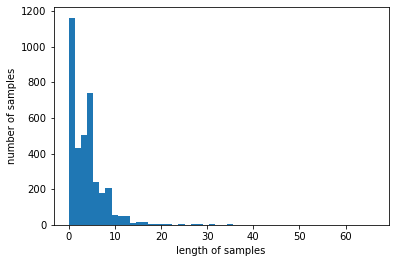

In [31]:
print('발화문의 최대 길이 :',max(len(l) for l in X_train))
print('발화문의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [32]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [47]:
max_len = 16
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 16 이하인 샘플의 비율: 100.0


In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
# 모든 샘플의 길이 15으로 맞추기
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [37]:
y_train

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=int64)

## LSTM

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Bidirectional
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [52]:
model = Sequential([
    Embedding(total_cnt+1, 100),  ##total_cnt가 아니라 vocab_size로 한번 나오는 단어는 제거하고 다시 해보기 
    LSTM(128,  dropout= 0.2),
    Dense(6,activation='softmax')
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         490600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
Total params: 608,622
Trainable params: 608,622
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('Bi-LSTM_class6.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [54]:
X_train

array([[   0,    0, 1367, ..., 1372,    5,  337],
       [   0,    0,    0, ...,  417,   33, 1373],
       [   0,    0,    0, ...,  338, 1377,  789],
       ...,
       [   0,    0,    0, ...,  606,  545, 4904],
       [   0,    0,    0, ...,    1,    9,   16],
       [   0,    0,    0, ...,   12, 4905,  221]])

In [57]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, callbacks=[es, mc], batch_size=50, validation_data=(X_test, y_test))

Epoch 1/5
74/74 [==============================] - 6s 43ms/step - loss: 1.2556 - acc: 0.5000 - val_loss: 1.4964 - val_acc: 0.4048A: 0s - loss: 1.2573 - acc: 0.4

Epoch 00001: val_acc improved from 0.37554 to 0.40476, saving model to Bi-LSTM_class6.h5
Epoch 2/5
74/74 [==============================] - 2s 32ms/step - loss: 1.0682 - acc: 0.5920 - val_loss: 1.5612 - val_acc: 0.3961

Epoch 00002: val_acc did not improve from 0.40476
Epoch 3/5
74/74 [==============================] - 2s 31ms/step - loss: 0.8875 - acc: 0.6600 - val_loss: 1.8701 - val_acc: 0.4134

Epoch 00003: val_acc improved from 0.40476 to 0.41342, saving model to Bi-LSTM_class6.h5
Epoch 4/5
74/74 [==============================] - 2s 31ms/step - loss: 0.7563 - acc: 0.7171 - val_loss: 1.8381 - val_acc: 0.3864

Epoch 00004: val_acc did not improve from 0.41342
Epoch 5/5
74/74 [==============================] - 2s 33ms/step - loss: 0.6464 - acc: 0.7555 - val_loss: 2.0138 - val_acc: 0.3398

Epoch 00005: val_acc did not improve